In [8]:
import numpy as np
import pandas as pd
from  scipy.stats import lognorm
import random
import matplotlib.pyplot as plt


Primer metodo para generar los datos sin embargo tiene un pero solo me genera de un solo valor y yo necesito el listado.

In [9]:
np.random.seed(10000000)
porc_enf = np.random.lognormal(mean = 8, sigma= 3.6, size= 100)
porc_enf
print(porc_enf.min())
print(porc_enf.max())

0.2372200135649288
12273220.050374826


In [10]:
def lognormal(mean,sigma):
    while True:
        pathogen = np.random.lognormal(mean=np.log(mean),sigma=np.log(sigma),size=None)
        if pathogen>=0 and pathogen <= 100:
            break
    return pathogen
lognormal(0.8, 3.6)

0.9883166998870656

Se genera un inconveniente porque solo nos esta generando de  a un solo dato

In [11]:
i = 0
while True:
   # for first iteration, make an initial vector of random values
  if i == 0:
    V = np.round(np.random.lognormal(0.8,sigma=3.6,size=100),2)

   #Make binary vectors for those values that are out of range and in range
  V_outRange = (V > 100) + 0.
  V_good = (V < 100) + 0.

   #keep the values in range
  V_ok = np.multiply(V, V_good)

   #Resample values that are out of range
  V_next = np.round(np.multiply(V_outRange, np.random.lognormal(0.8, 3.6, 100)),2)

   #Re-combine previous in-range values with newly sampled values
  V = V_ok + V_next

   #check to see if all values are in range, if not re-loop
  if (np.count_nonzero(V > 100)) == 0:
    break
  i +=100
V

array([3.000e-02, 1.000e-02, 1.709e+01, 3.880e+00, 6.250e+00, 4.400e-01,
       1.810e+00, 8.210e+00, 2.176e+01, 1.200e-01, 2.000e-02, 2.458e+01,
       1.000e-02, 2.700e+00, 8.680e+00, 0.000e+00, 2.000e-02, 4.690e+00,
       9.600e-01, 1.154e+01, 4.900e-01, 5.000e-02, 2.600e-01, 3.370e+00,
       7.200e-01, 3.000e-02, 5.698e+01, 4.700e-01, 6.270e+00, 1.890e+00,
       3.200e-01, 6.000e-02, 2.290e+00, 4.100e-01, 4.000e-02, 4.000e-02,
       4.605e+01, 3.790e+00, 4.000e-02, 4.000e-02, 6.000e-02, 2.693e+01,
       2.000e-02, 1.320e+00, 6.267e+01, 2.223e+01, 1.150e+00, 3.160e+00,
       7.000e-02, 6.800e-01, 3.330e+00, 4.290e+00, 0.000e+00, 5.658e+01,
       5.600e-01, 4.000e-02, 7.000e-02, 0.000e+00, 3.153e+01, 4.440e+00,
       8.000e-02, 4.710e+00, 3.678e+01, 3.240e+00, 0.000e+00, 3.860e+00,
       4.870e+00, 1.000e-02, 0.000e+00, 1.047e+01, 5.830e+00, 1.350e+00,
       4.471e+01, 9.170e+00, 3.900e-01, 0.000e+00, 7.150e+00, 1.330e+00,
       2.634e+01, 8.300e-01, 1.400e+00, 2.550e+00, 

Fuente: https://stackoverflow.com/questions/51995490/restricting-numpy-random-lognormal-to-a-given-range-python

Mostrar los valores maximos y minimos

In [25]:
print(V.min())
print(V.max())

0.0
62.67


##Categorización de la variable según la escala diagramatica

In [26]:
cat_V = [] #VECTOR DE CATEGORIAS VACIO, sin embargo categorizar implica perder datos
for pe_i in V:########cambiar este dato***
  if(pe_i <= 2):
    cat_V.append('A0')
  elif(pe_i <= 4):
    cat_V.append('A1')
  elif(pe_i <= 8):
    cat_V.append('A2')
  elif(pe_i <= 12):
    cat_V.append('A3')
  elif(pe_i <= 27):
    cat_V.append('A4')
  elif(pe_i <= 45):
    cat_V.append('A5')
  elif(pe_i <= 71):
    cat_V.append('A6')
  elif(pe_i <= 93):
    cat_V.append('A7')
  else:
    cat_V.append('A9')

cat_V_serie = pd.Series(cat_V) #aca se esta tabulando


In [14]:
cat_V_serie.describe() #Nos dice categorias

count     100
unique      7
top        A0
freq       51
dtype: object

In [15]:
cat_V_serie.value_counts() # estamos haciendo un conteo

A0    51
A1    13
A2    11
A3     9
A4     7
A6     5
A5     4
dtype: int64

Generar una grafica de linea (densidad) y de barras

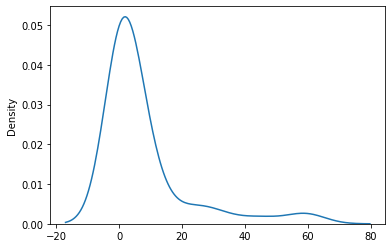

In [16]:
import seaborn as sns
sns.kdeplot(V)

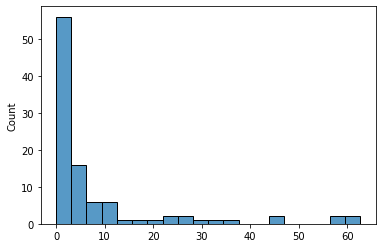

In [17]:
sns.histplot(V)

La mayoria son sanas o con leve afectación y solo tenemos un pequeño porcentaje de las hojas afectadas supreriores al 60%

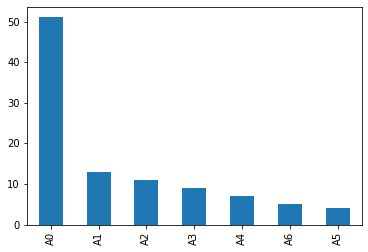

In [18]:
cat_V_serie.value_counts().plot(kind='bar')

El histograma y esta grafica de barras son muy distintas porque se ve mucho mas "suave" (menos contranstante) que el histograma ya que el histograma muestra como se comportan realmente los datos de porcentaje de daño, nosotros al haber realizado esta categorización perdemos información.

Calcular la media  y la mediana de los datos

In [19]:
media = V.mean()
print(media)

7.912500000000001


In [20]:
mediana =np.median(V)
print(mediana)

1.85


Los datos de la media al tener datos asimetricos realmente no representan la realidad de los datos, mientras que la mediana si permite identificar la realidad de la variable. Vean el contraste entre la linea 179 y la 180.
La mediana es 1,85 la media es 7.9125 es decir que el dato que ocupa la posición central no es el 7.9 sino el 1.85, la media al tener datos y una curva tan asimetricos la media es muy poco representativa.

![python](https://calculadorasonline.com/wp-content/uploads/2021/02/Media-mediana-y-moda.jpg)

La media fue de 7.9 y la mediana 1.85 al tener datos asimetricos las graficas se diferencian es por esto que podemos inferir que nosotros tenemos un sesgo o asimetria positivo. En este caso la mediana esta mas acercado a la realidad de nuestro ejercicio donde la mayoria de los datos se acercan a A1=2% del daño en escala y la grafica. Hay que recordar que la mediana es el cuartil medio (donde el 50% de los datos) y quartil inferior(25%) y quartil superior (75).

![python](https://www.researchgate.net/profile/Bernardo-Halfeld-Vieira/publication/262457253/figure/fig1/AS:669058995347469@1536527503662/Escala-diagramatica-para-avaliacao-da-severidade-da-mancha-de-cercospora-em-melancia.png)


Calcular los cuartiles y percentiles

In [21]:
q1 = pd.Series(V)
print(q1)

0      0.03
1      0.01
2     17.09
3      3.88
4      6.25
      ...  
95     0.02
96    60.19
97     0.84
98     1.69
99     2.71
Length: 100, dtype: float64


In [22]:
q1.quantile([0.05, 0.1,0.15, 0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])

0.05     0.0000
0.10     0.0190
0.15     0.0300
0.20     0.0400
0.25     0.0700
0.30     0.3020
0.35     0.4595
0.40     0.7860
0.45     1.3255
0.50     1.8500
0.55     2.7045
0.60     3.4140
0.65     4.3425
0.70     5.1580
0.75     7.4150
0.80    10.5780
0.85    13.5880
0.90    26.3990
0.95    44.7770
dtype: float64

\##En cual posición debo ubicarme en la escala para estimar la severidad real

In [23]:
print(cat_V_serie.value_counts())

A0    51
A1    13
A2    11
A3     9
A4     7
A6     5
A5     4
dtype: int64


In [24]:
cont = cat_V_serie.value_counts()

# Con el punto de corte real
frec1 = cont * [2, 4, 8, 12, 27, 45, 71]
print(frec1.sum()/100)

# Con el punto medio
frec2 = cont*[1, 2, 3, 13.5, 22.5, 35.5, 46.5]
print(frec2.sum()/100)

# Punto percentil 20%
frec3 = cont*[0.02, 0.04, 0.08, 0.12, 0.27, 0.45, 0.71]
print(frec3.sum()/100)

10.48
7.525
0.1048


# **Conclusión**: La mayor densidad de los datos se encuentra con el de la mediana: 1.85 o en su defecto la mayoría son valores que pertenecen al grupo que en la escala corresponde al 2% de severidad. Estimando la severidad con la escala diagramatica se ignora completamente la severidad real, para hallarla hay que considerar valores en la escala menores al percentil 2%. 